# Gravitational orbits in Cartesian coordinates



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

In [3]:
# Change the common font size
font_size = 14
plt.rcParams.update({'font.size': font_size})

In [4]:
class Orbit:
    def __init__(self, G, mass1, mass2):
        self.G = G
        self.mass1 = mass1
        self.mass2 = mass2
        
        
    def U(self, x1, y1, x2, y2):
        """Potential energy of the form U = -GMm/r."""
        r = np.sqrt((x1 - x2)**2 + (y1 - y2)**2)
        return -(self.G * self.mass1 * self.mass2) / r
    
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dx1/dt d^2x1/dt^2 dy1/dt d^2y1/dt^2 dx2/dt d^2x2/dt^2 dy2/dt d^2y2/dt^2]
        
        Parameters
        ----------
        t : float
            time 
        y : float
            8-component vector with y[0] = x1(t), y[1] = dx1/dt, y[2] = y1(t), y[3] = dy1/dt,
            y[4] = x2(t), y[5] = dx2/dt, y[6] = y2(t), y[7] = dy2/dt,
            
        """
        r = np.sqrt((y[0] - y[4])**2 + (y[2] - y[6])**2)
        F = (self.G * self.mass1 * self.mass2) / (r**2)
        theta = np.arctan((y[2] - y[6])/(y[0] - y[4]))
        
        return [y[1], -F * np.cos(theta), y[3], -F * np.sin(theta), y[5], F * np.cos(theta), y[7], F * np.sin(theta)]
    
    
    def solve_ode(self, t_pts, x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0,
                  method='RK23',
                  abserr=1.0e-8, relerr=1.0e-8):
        """
        Solve the ODE given initial conditions.
        Use solve_ivp with the option of specifying the method.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), 
                             y, t_eval=t_pts, method=method, 
                             atol=abserr, rtol=relerr)
        x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot = solution.y
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot
    
    
    def solve_ode_Leapfrog(self, t_pts, x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0):
        """
        Solve the ODE given initial conditions with the Leapfrog method.
        """
        delta_t = t_pts[1] - t_pts[0]
        
        # initialize the arrays with zeros
        num_t_pts = len(t_pts)
        x1 = np.zeros(num_t_pts)
        x1_dot = np.zeros(num_t_pts)
        x1_dot_half = np.zeros(num_t_pts)
        y1 = np.zeros(num_t_pts)
        y1_dot = np.zeros(num_t_pts)
        y1_dot_half = np.zeros(num_t_pts)
        x2 = np.zeros(num_t_pts)
        x2_dot = np.zeros(num_t_pts)
        x2_dot_half = np.zeros(num_t_pts)
        y2 = np.zeros(num_t_pts)
        y2_dot = np.zeros(num_t_pts)
        y2_dot_half = np.zeros(num_t_pts)
        
        # initial conditions
        x1[0] = x1_0
        x1_dot[0] = x1_dot_0
        y1[0] = y1_0
        y1_dot[0] = y1_dot_0
        x2[0] = x2_0
        x2_dot[0] = x2_dot_0
        y2[0] = y2_0
        y2_dot[0] = y2_dot_0
        
        # step through the differential equation
        for i in np.arange(num_t_pts - 1):
            t = t_pts[i]
            y = [x1[i], x1_dot[i], y1[i], y1_dot[i], x2[i], x2_dot[i], y2[i], y2_dot[i]]
            x1_dot_half[i] = x1_dot[i] + self.dy_dt(t, y)[1] * delta_t/2.
            x1[i+1] = x1[i] + x1_dot_half[i] * delta_t
            y1_dot_half[i] = y1_dot[i] + self.dy_dt(t, y)[3] * delta_t/2.
            y1[i+1] = y1[i] + y1_dot_half[i] * delta_t
            x2_dot_half[i] = x2_dot[i] + self.dy_dt(t, y)[5] * delta_t/2.
            x2[i+1] = x2[i] + x2_dot_half[i] * delta_t
            y2_dot_half[i] = y2_dot[i] + self.dy_dt(t, y)[7] * delta_t/2.
            y2[i+1] = y2[i] + y2_dot_half[i] * delta_t
            
            y = [x1[i+1], x1_dot[i], y1[i+1], y1_dot[i], x2[i+1], x2_dot[i], y2[i+1], y2_dot[i]]
            x1_dot[i+1] = x1_dot_half[i] + self.dy_dt(t, y)[1] * delta_t/2.
            y1_dot[i+1] = y1_dot_half[i] + self.dy_dt(t, y)[3] * delta_t/2.
            x2_dot[i+1] = x2_dot_half[i] + self.dy_dt(t, y)[5] * delta_t/2.
            y2_dot[i+1] = y2_dot_half[i] + self.dy_dt(t, y)[7] * delta_t/2.
            
            #y = [r[i], r_dot[i], phi[i]]
            #r_dot_half[i] = r_dot[i] + self.dy_dt(t, y)[1] * delta_t/2.
            #r[i+1] = r[i] + r_dot_half[i] * delta_t
            
            #y = [r[i+1], r_dot[i], phi[i]]
            #r_dot[i+1] = r_dot_half[i] + self.dy_dt(t, y)[1] * delta_t/2.
            
            #phi[i+1] = phi[i] + self.dy_dt(t,y)[2] * delta_t
        return x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot   
        
        
    def energy(self, t_pts, x1, x1_dot, y1, y1_dot, x2, x2_dot, y2, y2_dot):
        """Evaluate the energy as a function of time"""
        return self.mass1 * (x1_dot**2 + y1_dot**2)/2. + self.mass2 * (x2_dot**2 + y2_dot**2)/2. + self.U(x1, y1, x2, y2)

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

Notice than if one of the bodies is much heavier than the other, consider the case mass1 >> mass2, we find that the focus of the ecllipse orbit is inside the heavier mass, which means the two-body problem is reduced to a one-body problem that considered in class.

As for general case, we have:


## Plot orbit and check energy conservation

In [33]:
# Make an orbit
G = 6. * 10**(-11)  
mass1 = 40. 
mass2 = 20. 
o1 = Orbit(G, mass1=mass1, mass2=mass2)

# Plotting time 
t_start = 0.
t_end = 10.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

# Initial conditions
x1_0 = 1.
x1_dot_0 = -1.
y1_0 = 1.
y1_dot_0 = 1.

x2_0 = -(mass1 / mass2) * x1_0      # To make com at origin and velocity=0
x2_dot_0 = -(mass1 / mass2) * x1_dot_0
y2_0 = -(mass1 / mass2) * y1_0
y2_dot_0 = -(mass1 / mass2) * y1_dot_0
#x2_0 = 1.
#x2_dot_0 = 0.
#y2_0 = 1.
#y2_dot_0 = 0.

x1_pts, x1_dot_pts, y1_pts, y1_dot_pts, x2_pts, x2_dot_pts, y2_pts, y2_dot_pts \
                           = o1.solve_ode(t_pts, x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0)
x1_pts_LF, x1_dot_pts_LF, y1_pts_LF, y1_dot_pts_LF, x2_pts_LF, x2_dot_pts_LF, y2_pts_LF, y2_dot_pts_LF \
                           = o1.solve_ode_Leapfrog(t_pts, x1_0, x1_dot_0, y1_0, y1_dot_0, x2_0, x2_dot_0, y2_0, y2_dot_0)

energy_0 = o1.mass1 * (x1_dot_0**2 + y1_dot_0**2)/2. + o1.mass2 * (x2_dot_0**2 + y2_dot_0**2)/2. + o1.U(x1_0, y1_0, x2_0, y2_0)
print(f'energy = {energy_0:.2f}')

energy = 120.00


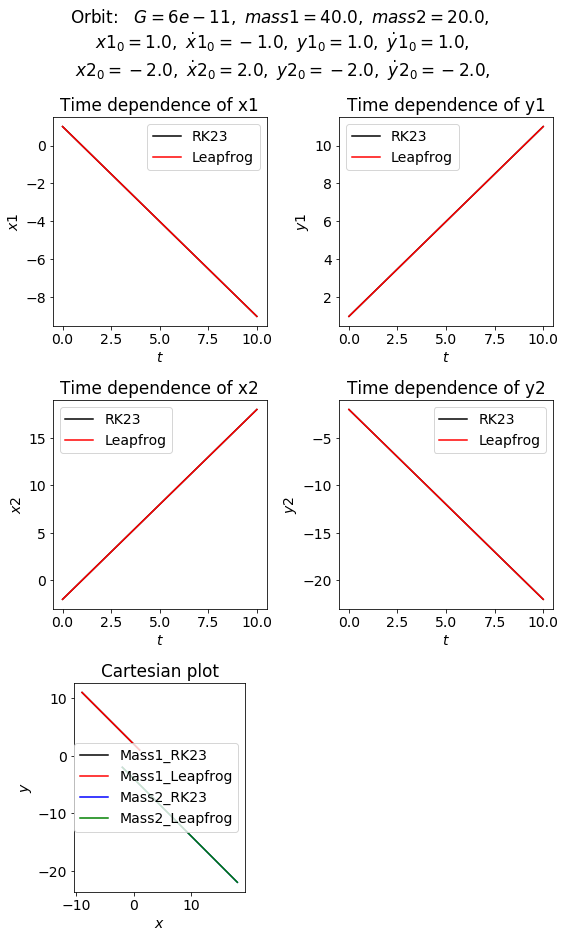

In [34]:
fig_4 = plt.figure(figsize=(8,12))

overall_title = 'Orbit:  ' + \
                rf' $G = {o1.G},$' + \
                rf' $mass1 = {o1.mass1:.1f},$' + \
                rf' $mass2 = {o1.mass2:.1f},$' + \
                '\n' + \
                rf' $x1_0 = {x1_0:.1f},$' + \
                rf' $\dot x1_0 = {x1_dot_0:.1f},$' + \
                rf' $y1_0 = {y1_0:.1f},$' + \
                rf' $\dot y1_0 = {y1_dot_0:.1f},$' + \
                '\n' + \
                rf' $x2_0 = {x2_0:.1f},$' + \
                rf' $\dot x2_0 = {x2_dot_0:.1f},$' + \
                rf' $y2_0 = {y2_0:.1f},$' + \
                rf' $\dot y2_0 = {y2_dot_0:.1f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig_4.suptitle(overall_title, va='baseline')

ax_4a = fig_4.add_subplot(3,2,1)
ax_4a.plot(t_pts, x1_pts, color='black', label='RK23')
ax_4a.plot(t_pts, x1_pts_LF, color='red', label='Leapfrog')
ax_4a.set_xlabel(r'$t$')
ax_4a.set_ylabel(r'$x1$')
ax_4a.set_title('Time dependence of x1')
ax_4a.legend()

ax_4b = fig_4.add_subplot(3,2,2)
ax_4b.plot(t_pts, y1_pts, color='black', label='RK23')
ax_4b.plot(t_pts, y1_pts_LF, color='red', label='Leapfrog')
ax_4b.set_xlabel(r'$t$')
ax_4b.set_ylabel(r'$y1$')
ax_4b.set_title('Time dependence of y1')
ax_4b.legend()

ax_4c = fig_4.add_subplot(3,2,3)
ax_4c.plot(t_pts, x2_pts, color='black', label='RK23')
ax_4c.plot(t_pts, x2_pts_LF, color='red', label='Leapfrog')
ax_4c.set_xlabel(r'$t$')
ax_4c.set_ylabel(r'$x2$')
ax_4c.set_title('Time dependence of x2')
ax_4c.legend()

ax_4d = fig_4.add_subplot(3,2,4)
ax_4d.plot(t_pts, y2_pts, color='black', label='RK23')
ax_4d.plot(t_pts, y2_pts_LF, color='red', label='Leapfrog')
ax_4d.set_xlabel(r'$t$')
ax_4d.set_ylabel(r'$y2$')
ax_4d.set_title('Time dependence of y2')
ax_4d.legend()

ax_4e = fig_4.add_subplot(3,2,5)
ax_4e.plot(x1_pts, y1_pts, color='black', label='Mass1_RK23')
ax_4e.plot(x1_pts_LF, y1_pts_LF, color='red', label='Mass1_Leapfrog')
ax_4e.plot(x2_pts, y2_pts, color='blue', label='Mass2_RK23')
ax_4e.plot(x2_pts_LF, y2_pts_LF, color='green', label='Mass2_Leapfrog')
ax_4e.set_xlabel(r'$x$')
ax_4e.set_ylabel(r'$y$')
ax_4e.set_aspect('equal')
ax_4e.set_title('Cartesian plot')
ax_4e.legend()


fig_4.tight_layout()
#fig_4.savefig('Leapfrog_orbit_1.png', dpi=200, bbox_inches='tight')



In [35]:
E_tot_pts = o1.energy(t_pts, x1_pts, x1_dot_pts, y1_pts, y1_dot_pts, x2_pts, x2_dot_pts, y2_pts, y2_dot_pts )
E_tot_0 = E_tot_pts[0]
E_tot_rel_pts = np.abs((E_tot_pts - E_tot_0)/E_tot_0)

E_tot_pts_LF = o1.energy(t_pts, x1_pts_LF, x1_dot_pts_LF, y1_pts_LF, y1_dot_pts_LF, x2_pts_LF, x2_dot_pts_LF, y2_pts_LF, y2_dot_pts_LF)
E_tot_0_LF = E_tot_pts_LF[0]
E_tot_rel_pts_LF = np.abs((E_tot_pts_LF - E_tot_0_LF)/E_tot_0_LF)


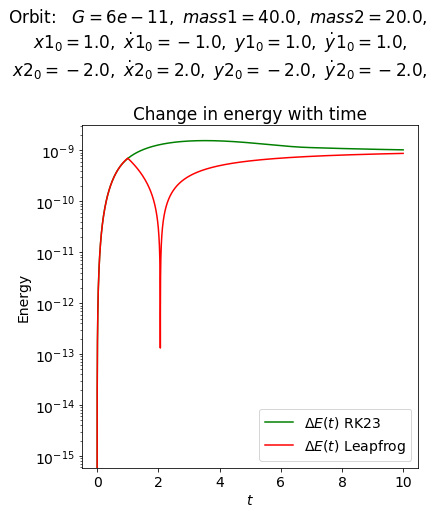

In [36]:
fig_5 = plt.figure(figsize=(6,6))

overall_title = 'Orbit:  ' + \
                rf' $G = {o1.G},$' + \
                rf' $mass1 = {o1.mass1:.1f},$' + \
                rf' $mass2 = {o1.mass2:.1f},$' + \
                '\n' + \
                rf' $x1_0 = {x1_0:.1f},$' + \
                rf' $\dot x1_0 = {x1_dot_0:.1f},$' + \
                rf' $y1_0 = {y1_0:.1f},$' + \
                rf' $\dot y1_0 = {y1_dot_0:.1f},$' + \
                '\n' + \
                rf' $x2_0 = {x2_0:.1f},$' + \
                rf' $\dot x2_0 = {x2_dot_0:.1f},$' + \
                rf' $y2_0 = {y2_0:.1f},$' + \
                rf' $\dot y2_0 = {y2_dot_0:.1f},$' + \
                '\n'     # \n means a new line (adds some space here)
fig_5.suptitle(overall_title, va='baseline')

ax_5a = fig_5.add_subplot(1,1,1)
#ax_5a.semilogy(t_pts, np.abs(E_tot_pts), color='black', label=r'$E(t)$')
ax_5a.semilogy(t_pts, E_tot_rel_pts, 
               color='green', label=r'$\Delta E(t)$ RK23')
#ax_5a.semilogy(t_pts, E_tot_rel_pts_Euler, 
#               color='blue', label=r'$\Delta E(t)$ Euler')
ax_5a.semilogy(t_pts, E_tot_rel_pts_LF, 
               color='red', label=r'$\Delta E(t)$ Leapfrog')
#ax_5a.set_ylim(1.e-10, 1.e-2)    # (1.e-12, 5)
ax_5a.set_xlabel(r'$t$')
ax_5a.set_ylabel(r'Energy')
ax_5a.set_title('Change in energy with time')
ax_5a.legend()

fig_5.tight_layout()
#fig_5.savefig('Leapfrog_energy_test_1.png', dpi=200, bbox_inches='tight')
